**구글 드라이브 연동**

In [1]:
# Colab 사용시 실행

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**현재 내 위치잘 있나 파악**

In [2]:
!pwd

/content


**라이브러리 및 환경 구축**

In [3]:
!pip install roboflow
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 20.9 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO
from roboflow import Roboflow
import glob
import os
import random

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


**Roboflow 데이터 연동**

In [5]:
rf = Roboflow(api_key="pwucV0qVeD2nO2PjRqon")
project = rf.workspace("smart-farm-juaeh").project("only-zr9ic")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to only-1 in yolov8:: 100%|██████████| 6342/6342 [00:01<00:00, 3609.89it/s]


**모델 학습**

In [6]:
!pwd

/content


**폴더 이동**

In [7]:
%cd /content/only-1
#폴더,yaml파일명 바꾸기

/content/only-1


**ymal파일 열어서 경로 수정**

wandb api키 : da9fde9a0a1151eeb01a707f6795ae2c6f8b25ac

In [8]:
model = YOLO(model='yolov8n.pt', task='detect')

# yaml파일 경로 바꿔주기, 할때마다 달라질듯
model.train(data='/content/only-1/data.yaml',
            epochs=100,
            patience=3, # 조기 종료 조건
            save=True, # 모델 중간 저장 활성
            project='trained',
            name='trained_model',#모델 저장 경로 및 이름, trained/trained_model/weights 폴더에 가중치(weight) 파일들이 자동으로 저장
            exist_ok=False,
            pretrained=True, # False는 잘 안씀, 주로 True로 학습된 가중치 불러와서 사용함
            optimizer='AdamW',
            verbose=False,
            seed=2023,
            resume=False,
            freeze=None,
            batch=32,  # 배치 사이즈
            lr0=1e-3  # 초기 학습률
            )

100%|██████████| 6.25M/6.25M [00:00<00:00, 99.8MB/s]


Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/only-1/data.yaml, epochs=100, time=None, patience=3, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=trained, name=trained_model, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=False, seed=2023, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

100%|██████████| 755k/755k [00:00<00:00, 24.5MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLO11n...


100%|██████████| 5.35M/5.35M [00:00<00:00, 105MB/s]


AMP: checks passed ✅


train: Scanning /content/only-1/train/labels... 2769 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2769/2769 [00:01<00:00, 1844.42it/s]


train: New cache created: /content/only-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/only-1/valid/labels... 264 images, 0 backgrounds, 0 corrupt: 100%|██████████| 264/264 [00:00<00:00, 570.76it/s]

val: New cache created: /content/only-1/valid/labels.cache


Plotting labels to trained/trained_model/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to trained/trained_model
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.55G     0.7257      1.281     0.9789        114        640: 100%|██████████| 87/87 [00:55<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]

                   all        264       1035      0.587      0.753      0.871      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.05G     0.6185     0.6351     0.9253         80        640: 100%|██████████| 87/87 [00:52<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


                   all        264       1035      0.851      0.881      0.965      0.877

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.06G     0.5821     0.5679     0.9197        101        640: 100%|██████████| 87/87 [00:52<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]


                   all        264       1035      0.955      0.877       0.98      0.884

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.04G     0.5819     0.5387     0.9198        118        640: 100%|██████████| 87/87 [00:51<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]

                   all        264       1035      0.927      0.935      0.954      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.05G     0.5708     0.5027     0.9206        119        640: 100%|██████████| 87/87 [00:51<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]

                   all        264       1035       0.93      0.956      0.983      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.02G      0.551     0.4747     0.9112        118        640: 100%|██████████| 87/87 [00:54<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.17it/s]

                   all        264       1035      0.949      0.973      0.986      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.06G     0.5474     0.4539     0.9127        114        640: 100%|██████████| 87/87 [00:51<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.07it/s]

                   all        264       1035      0.969      0.961      0.988      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.03G     0.5341     0.4394      0.904         88        640: 100%|██████████| 87/87 [00:51<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.04it/s]

                   all        264       1035      0.977      0.971      0.991      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.05G     0.5326     0.4329     0.9041        109        640: 100%|██████████| 87/87 [00:51<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.14it/s]

                   all        264       1035       0.94      0.973      0.983      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.04G     0.5283     0.4263     0.9068        105        640: 100%|██████████| 87/87 [00:50<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.09it/s]

                   all        264       1035      0.976      0.947      0.988      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.04G     0.5194     0.4153     0.9055         90        640: 100%|██████████| 87/87 [00:50<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]


                   all        264       1035      0.869      0.901       0.94      0.879
EarlyStopping: Training stopped early as no improvement observed in last 3 epochs. Best results observed at epoch 8, best model saved as best.pt.
To update EarlyStopping(patience=3) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

11 epochs completed in 0.177 hours.
Optimizer stripped from trained/trained_model/weights/last.pt, 6.2MB
Optimizer stripped from trained/trained_model/weights/best.pt, 6.2MB

Validating trained/trained_model/weights/best.pt...
Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.03s/it]


                   all        264       1035      0.977      0.971      0.991      0.931
Speed: 0.8ms preprocess, 2.3ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to trained/trained_model


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ea065c172b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

**Test 이미지 불러오기**

In [ ]:
# 테스트 이미지 경로 설정
test_image = "/content/level/test/images"
test_label = "/content/level/test/labels"

# 테스트 데이터에서 파일 패턴에 맞는 경로를 얻기 위해 glob 함수 사용
test_random = glob.glob(os.path.join(test_image, "*.jpg")) # glob() 함수로 호출
random_image = random.sample(test_random, 10)

**웹캠 사용**

In [ ]:
import cv2

# 웹캠 열기 (2번 인덱스 사용)
cap = cv2.VideoCapture(1)

if not cap.isOpened():
    print("웹캠을 열 수 없습니다.")
    exit()

while True:
    # 웹캠에서 프레임 읽기
    ret, frame = cap.read()

    if not ret:
        print("웹캠에서 프레임을 읽을 수 없습니다.")
        break

    # 프레임을 팝업 창으로 표시
    cv2.imshow('Webcam Video', frame)

    # 'q' 키를 누르면 종료
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 리소스 해제
cap.release()
cv2.destroyAllWindows()


웹캠을 열 수 없습니다.
웹캠에서 프레임을 읽을 수 없습니다.


**함수**

In [ ]:
# test 이미지 예측 결과 및 실제 바운딩 박스 시각화하는  함수
def test_predict(test_image, model, test_label):
    # 이미지 로드
    img = cv2.imread(test_image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 모델 예측
    results = model.predict(test_image)
    predicted_img = results[0].plot()  # 모델이 예측한 바운딩 박스가 그려진 이미지

    # 실제 라벨 불러오기
    label_path = os.path.join(test_label, os.path.basename(test_image).replace(".jpg", ".txt"))
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            labels = f.readlines()

        # 실제 바운딩 박스 그리기
        for label in labels:
            class_id, x_center, y_center, width, height = map(float, label.strip().split())
            img_height, img_width = img.shape[:2]
            x1 = int((x_center - width / 2) * img_width)
            y1 = int((y_center - height / 2) * img_height)
            x2 = int((x_center + width / 2) * img_width)
            y2 = int((y_center + height / 2) * img_height)

            # 바운딩 박스 그리기 (초록색: 실제 라벨)
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    return predicted_img, img  # 예측된 이미지, 실제 라벨이 그려진 이미지


#  예측 결과 및 실제 바운딩 박스 plot으로 10개씩 구현
def show_comparisons(random_image, model, test_label):
    plt.figure(figsize=(20, 40))
    for i, test_image in enumerate(random_image):
        predicted_img, actual_img = test_predict(test_image, model, test_label)

        # 왼쪽: 예측된 이미지
        plt.subplot(10, 2, 2 * i + 1)
        plt.imshow(predicted_img)
        plt.title(f"Predicted {os.path.basename(test_image)}")

        # 오른쪽: 실제 라벨이 그려진 이미지
        plt.subplot(10, 2, 2 * i + 2)
        plt.imshow(actual_img)
        plt.title(f"Actual {os.path.basename(test_image)}")

    plt.tight_layout()
    plt.show()

**함수 실행**

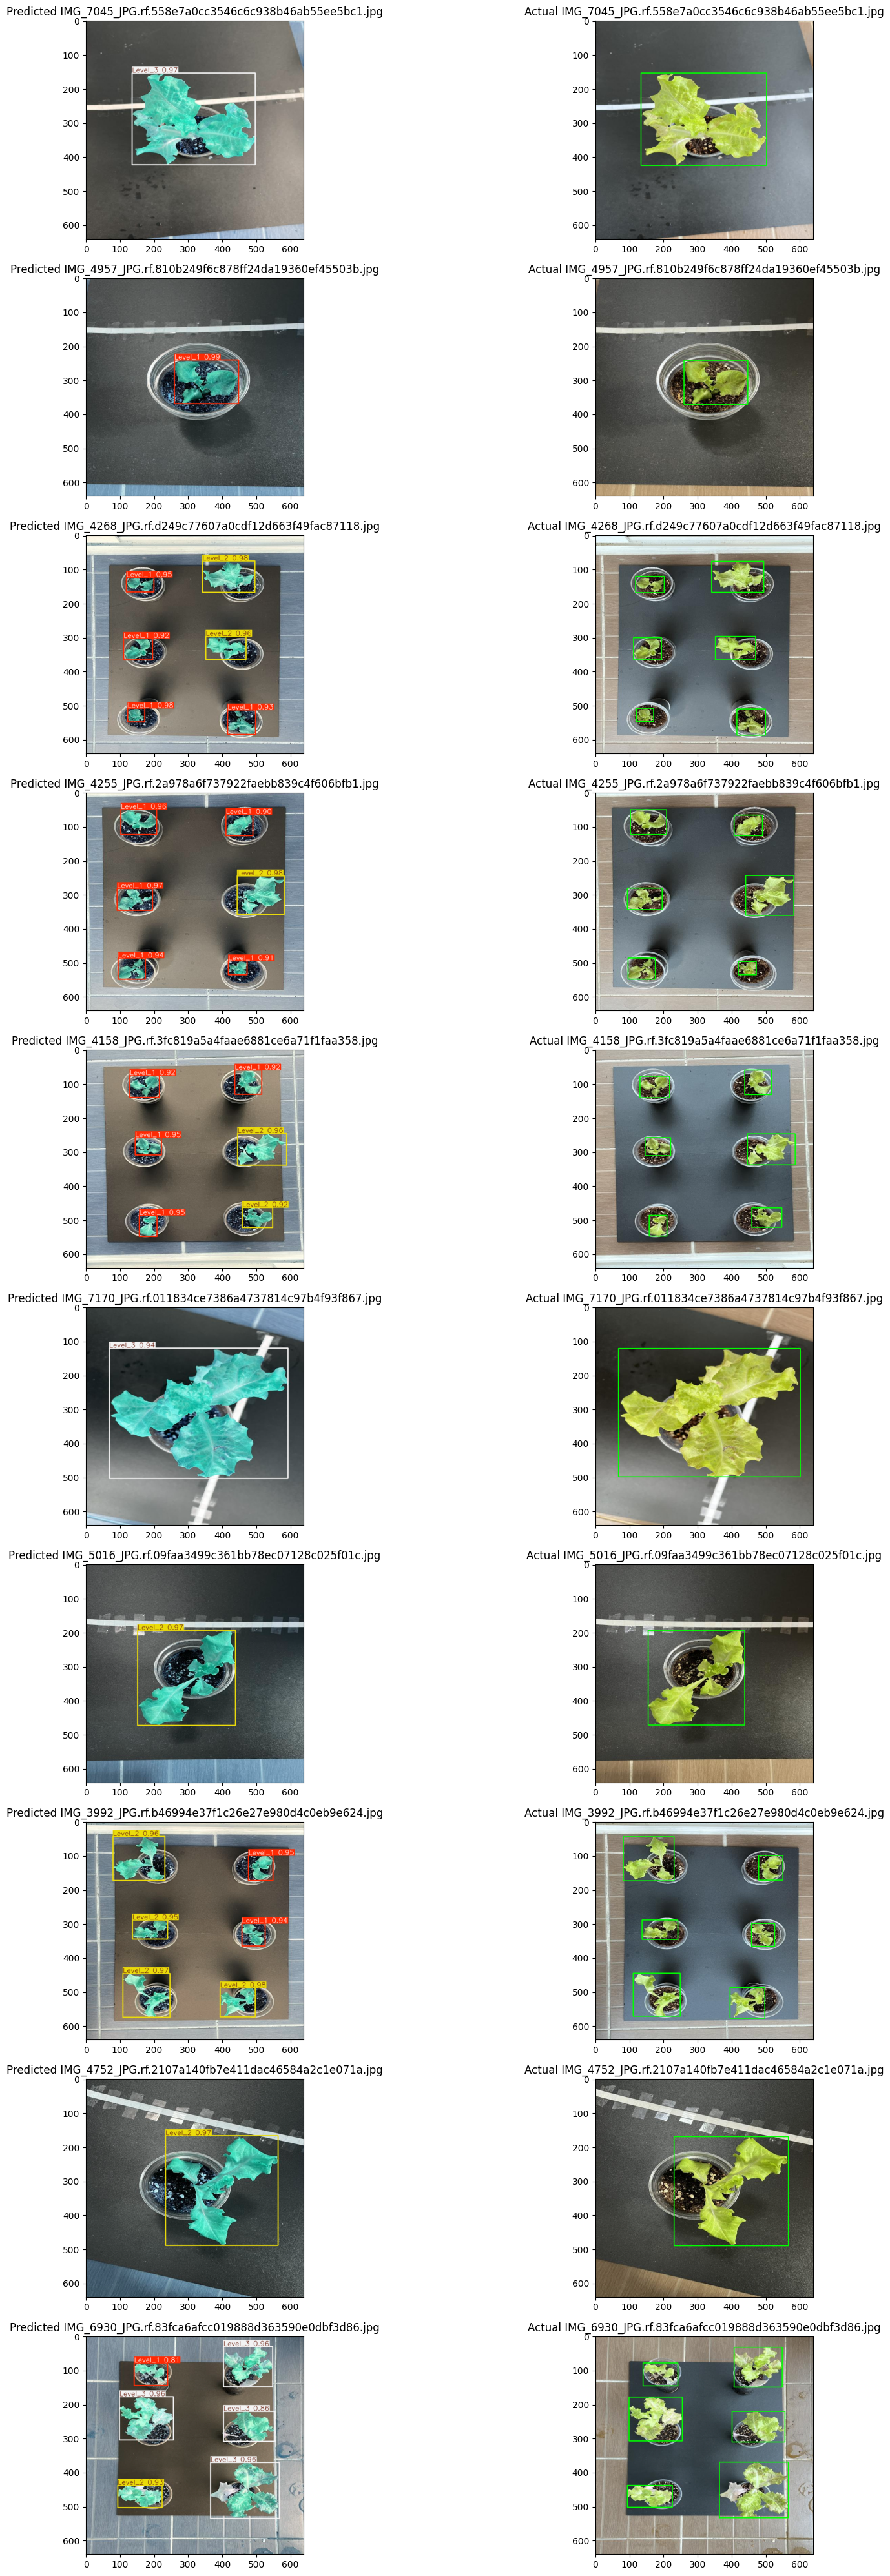

In [ ]:
import matplotlib.pyplot as plt
import cv2

# 랜덤 이미지에 대한 예측과 실제 라벨 비교 시각화
show_comparisons(random_image, model, test_label)